# Loading the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
data = pd.read_csv('House Price Prediction Dataset.csv')

# Information about the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


# Checking null values

In [4]:
data.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

# Function for Categorical Graph: Bar Chart

In [5]:
def plot_location_distribution(data):
    """
    Creates a bar chart showing the distribution of houses by location.
    """
    plt.figure(figsize=(8, 6))
    data['Location'].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Distribution of Houses by Location')
    plt.xlabel('Location')
    plt.ylabel('Number of Houses')
    plt.show()

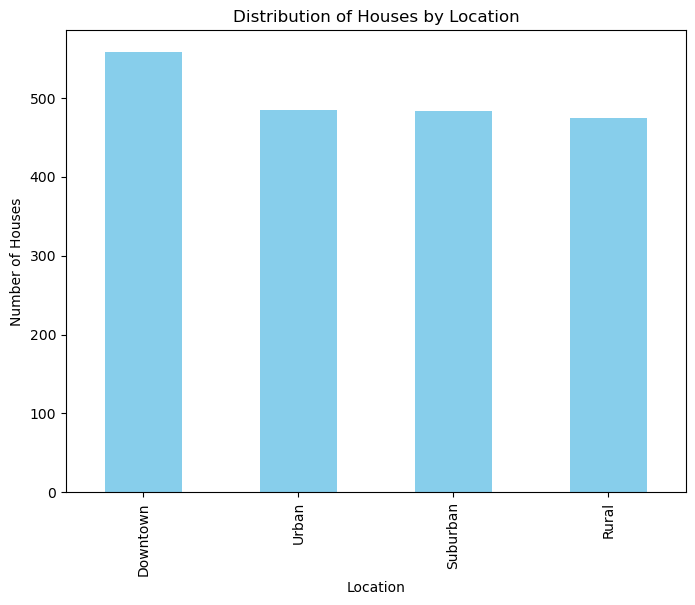

In [6]:
plot_location_distribution(data)

# Function for Relational Graph: Scatter Plot

In [7]:
def plot_area_vs_price(data):
    """
    Creates a scatter plot showing the relationship between area and price.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Area', y='Price', data=data, hue='Condition', palette='viridis')
    plt.title('Area vs. Price of Houses')
    plt.xlabel('Area (sq ft)')
    plt.ylabel('Price ($)')
    plt.legend(title='Condition')
    plt.show()

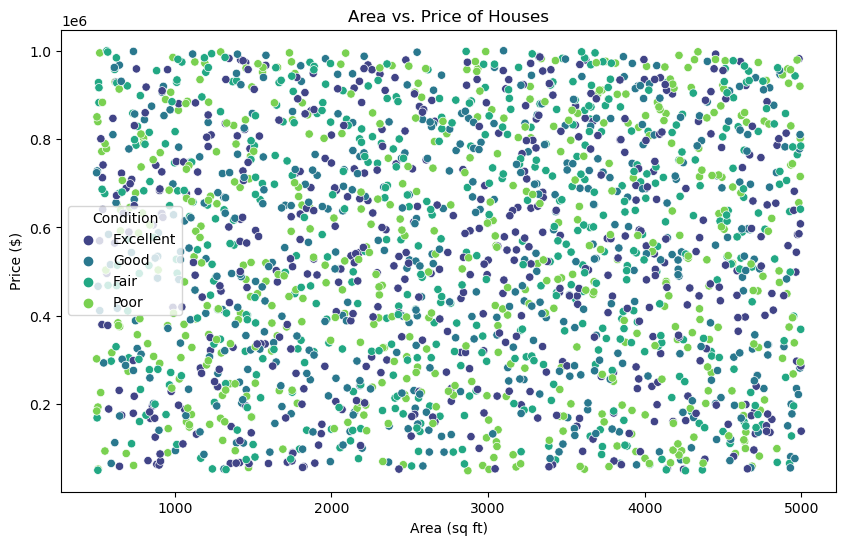

In [8]:
plot_area_vs_price(data)

# Data Mapping

In [9]:
# Map 'Location' categories to numeric values
location_mapping = {
    'Downtown': 1,
    'Rural': 2,
    'Suburban': 3,
    'Urban': 4
}
data['Location'] = data['Location'].map(location_mapping)
# Map 'Condition' categories to numeric values
condition_mapping = {
    'Excellent': 4,
    'Good': 3,
    'Fair': 2,
    'Poor': 1
}
data['Condition'] = data['Condition'].map(condition_mapping)
# Map 'Garage' to numeric values
garage_mapping = {
    'Yes': 1,
    'No': 0
}
data['Garage'] = data['Garage'].map(garage_mapping)

# Display basic statistics and correlation matrix

In [10]:
# Display basic statistics and correlation matrix
def display_statistics(data):
    """
    Displays summary statistics and correlation matrix for the dataset.
    Also calculates skewness and kurtosis for numeric features.
    """
    # Get summary statistics for all columns
    summary_stats = data.describe(include='all')
    
    # Select only numeric columns for correlation
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    correlation_matrix = numeric_data.corr()

    # Calculate skewness and kurtosis for numeric features
    skewness = numeric_data.skew()
    kurtosis = numeric_data.kurtosis()

    # Print summary statistics, skewness, kurtosis, and correlation matrix
    print("Summary Statistics:\n", summary_stats)
    print("\nSkewness:\n", skewness)
    print("\nKurtosis:\n", kurtosis)
    print("\nCorrelation Matrix:\n", correlation_matrix)
    
    return summary_stats, correlation_matrix, skewness, kurtosis

# Call the function with the dataset
summary_stats, correlation_matrix, skewness, kurtosis = display_statistics(data)

Summary Statistics:
                 Id         Area     Bedrooms   Bathrooms       Floors  \
count  2000.000000  2000.000000  2000.000000  2000.00000  2000.000000   
mean   1000.500000  2786.209500     3.003500     2.55250     1.993500   
std     577.494589  1295.146799     1.424606     1.10899     0.809188   
min       1.000000   501.000000     1.000000     1.00000     1.000000   
25%     500.750000  1653.000000     2.000000     2.00000     1.000000   
50%    1000.500000  2833.000000     3.000000     3.00000     2.000000   
75%    1500.250000  3887.500000     4.000000     4.00000     3.000000   
max    2000.000000  4999.000000     5.000000     4.00000     3.000000   

         YearBuilt     Location    Condition       Garage          Price  
count  2000.000000  2000.000000  2000.000000  2000.000000    2000.000000  
mean   1961.446000     2.447500     2.488000     0.481000  537676.855000  
std      35.926695     1.136173     1.126273     0.499764  276428.845719  
min    1900.000000   

# Function for Statistical Graph: Correlation Heatmap

In [11]:
def plot_correlation_heatmap(data):
    """
    Creates a heatmap showing the correlation between numerical features.
    Includes the mapped 'Location' column as a numeric feature.
    """
    plt.figure(figsize=(8, 6))
    
    # Select only numeric columns for the correlation matrix
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    correlation_matrix = numeric_data.corr()
    
    # Create the heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title('Correlation Matrix Heatmap')
    plt.show()

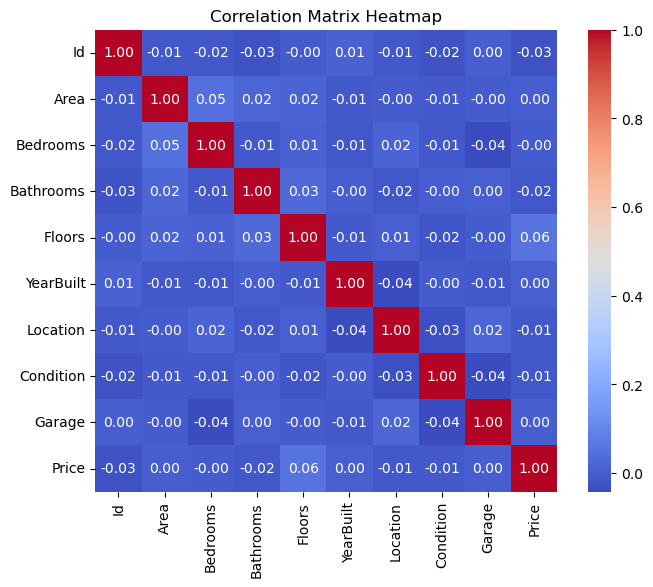

In [12]:
plot_correlation_heatmap(data)